In [1]:
import zipfile

# Define the path to your zip file
zip_file_path = '/content/Dataset.zip'  # Update with the correct path

# Define the directory where you want to extract the files
extracted_dir_path = '/content/Dataset'  # Update with the desired directory path

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction completed.")

Extraction completed.


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
 #re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Dataset/Train'
valid_path = '/content/Dataset/Dataset/Test'

In [4]:
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [5]:
# freeze existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [7]:
 # useful for getting number of output classes
folders = glob('/content/Dataset/Dataset/Train')

In [8]:
folders

['/content/Dataset/Dataset/Train']

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-070b10e8c207>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 15s 1s/step - loss: 2.7323 - accuracy: 0.5144 - val_loss: 0.6281 - val_accuracy: 0.6716
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 0.6712 - accuracy: 0.5962 - val_loss: 0.7352 - val_accuracy: 0.4627
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.5434 - accuracy: 0.7404 - val_loss: 0.8729 - val_accuracy: 0.3955
Epoch 4/50
13/13 [==============================] - 14s 1s/step - loss: 0.4731 - accuracy: 0.7620 - val_loss: 0.8728 - val_accuracy: 0.4478
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.4372 - accuracy: 0.7957 - val_loss: 0.5726 - val_accuracy: 0.6791
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.3734 - accuracy: 0.8438 - val_loss: 0.7614 - val_accuracy: 0.5746
Epoch 7/50
13/13 [==============================] - 14s 1s/step - loss: 0.3398 - accuracy: 0.8558 - val_loss: 0.6267 - val_accuracy: 0.6269
Epoch 8/50
13/13 [==

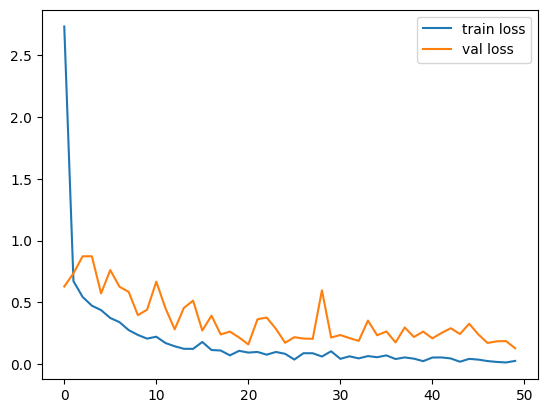

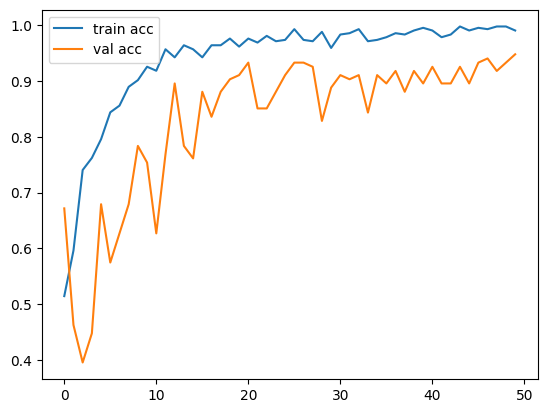

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 176ms/step


In [22]:
y_pred

array([[2.34997615e-01, 7.65002370e-01],
       [1.98606029e-02, 9.80139375e-01],
       [9.99997914e-01, 2.02007595e-06],
       [9.99990880e-01, 9.07805861e-06],
       [9.99999464e-01, 4.28598980e-07],
       [3.89032951e-03, 9.96109605e-01],
       [9.99999940e-01, 7.16753046e-10],
       [9.99998868e-01, 1.01939622e-06],
       [9.99997318e-01, 2.63087782e-06],
       [9.99821663e-01, 1.78352071e-04],
       [5.26269451e-02, 9.47373092e-01],
       [9.99999940e-01, 4.43419950e-08],
       [4.30895954e-01, 5.69104016e-01],
       [9.99996364e-01, 3.55583506e-06],
       [6.40335917e-01, 3.59664112e-01],
       [9.66355146e-04, 9.99033689e-01],
       [9.99996483e-01, 3.51127983e-06],
       [3.54258306e-02, 9.64574099e-01],
       [1.48325609e-02, 9.85167384e-01],
       [9.99999940e-01, 5.12299545e-15],
       [9.28006351e-01, 7.19935820e-02],
       [9.99998748e-01, 1.16806143e-06],
       [9.99995053e-01, 4.83356371e-06],
       [1.48031081e-03, 9.98519719e-01],
       [9.999991

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('/content/Dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_205.png',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 0s 84ms/step


array([[0., 1.]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 27ms/step


In [33]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [34]:
!pip install streamlit

import streamlit as st
from PIL import Image
from keras.models import load_model
from keras.applications.vgg19 import preprocess_input
import numpy as np
import os



# Load the pre-trained model
MODEL_PATH = '/content/model_vgg19.h5'
model = load_model(MODEL_PATH)

# Define the Streamlit app
def main():
    st.title("Malaria-Infected Cell Classification")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image.', use_column_width=True)
        st.write("")

        # Preprocess the image
        img = image.resize((224, 224))  # Resize image to match model's expected sizing
        img_array = np.array(img)  # Convert PIL image to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Preprocess image

        # Make prediction
        preds = model.predict(img_array)
        pred_class = np.argmax(preds, axis=1)

        if pred_class == 0:
            st.write("The cell is Infected with Malaria.")
        else:
            st.write("The cell is not Infected with Malaria.")

if __name__ == '__main__':
    main()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


2024-03-20 08:41:55.901 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [35]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.191.91:8501

  Stopping...
^C
